In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Loading in Data

In [59]:
xb_predictions = pd.read_csv('xg_probabilities.csv')
xb_predictions = xb_predictions.drop(columns = 'Unnamed: 0')

In [60]:
xb_predictions.columns = ['negative_prob','neutral_prob', 'positive_prob', 'predicted', 'true']
xb_predictions['predicted'] = xb_predictions['predicted'].replace(0, 'negative')
xb_predictions['predicted'] = xb_predictions['predicted'].replace(1, 'neutral')
xb_predictions['predicted'] = xb_predictions['predicted'].replace(2, 'positive')

xb_predictions['true'] = xb_predictions['true'].replace(0, 'negative')
xb_predictions['true'] = xb_predictions['true'].replace(1, 'neutral')
xb_predictions['true'] = xb_predictions['true'].replace(2, 'positive')

In [61]:
xb_predictions.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
0,0.228550,0.459062,0.312388,neutral,positive
1,0.162734,0.407320,0.429946,positive,neutral
2,0.418522,0.334772,0.246706,negative,negative
3,0.002134,0.000336,0.997530,positive,positive
4,0.813161,0.130280,0.056559,negative,negative


In [62]:
mnb_predictions = pd.read_csv('mnb_probabilities.csv')
mnb_predictions = mnb_predictions.drop(columns = 'Unnamed: 0')

In [63]:
mnb_predictions.columns = ['negative_prob','neutral_prob', 'positive_prob', 'predicted', 'true']

In [64]:
mnb_predictions.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
0,0.180112,0.351264,0.468624,positive,positive
1,0.238066,0.360668,0.401265,positive,neutral
2,0.395680,0.271121,0.333199,negative,negative
3,0.022461,0.010557,0.966982,positive,positive
4,0.558826,0.177121,0.264052,negative,negative


In [65]:
rf_predictions = pd.read_csv('rf_probabilities.csv')
rf_predictions = rf_predictions.drop(columns = 'Unnamed: 0')

In [66]:
rf_predictions.columns = ['negative_prob','neutral_prob', 'positive_prob', 'predicted', 'true']

In [67]:
rf_predictions.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
0,0.334582,0.362450,0.302967,neutral,positive
1,0.307086,0.398929,0.293986,neutral,neutral
2,0.335943,0.361862,0.302194,neutral,negative
3,0.182040,0.184229,0.633731,positive,positive
4,0.436330,0.307017,0.256653,negative,negative


### Reshaping data for visualization

In [68]:
import matplotlib.patches as mpatches

red = mpatches.Patch(color='indianred', label='Negative Prediction')
blue = mpatches.Patch(color='powderblue', label='Positive Prediction')
gray = mpatches.Patch(color='lightgray', label='Neutral Prediction')

In [69]:
#True vs. Predicted
xb_pred_counts = xb_predictions.groupby(['true', 'predicted']).size().reset_index()
rf_pred_counts = rf_predictions.groupby(['true', 'predicted']).size().reset_index()
mnb_pred_counts = mnb_predictions.groupby(['true', 'predicted']).size().reset_index()

In [70]:
xb_pred_counts

,true,predicted,0
0,negative,negative,1129
1,negative,neutral,822
2,negative,positive,543
3,neutral,negative,369
4,neutral,neutral,1761
5,neutral,positive,633
6,positive,negative,343
7,positive,neutral,1017
8,positive,positive,3245


In [71]:
rf_pivot = rf_pred_counts.pivot(index='true', columns='predicted', values=0)
mnb_pivot = mnb_pred_counts.pivot(index='true', columns='predicted', values=0)
xb_pivot = xb_pred_counts.pivot(index='true', columns='predicted', values=0)

In [72]:
colors = ['powderblue', 'indianred', 'lightgrey']

''

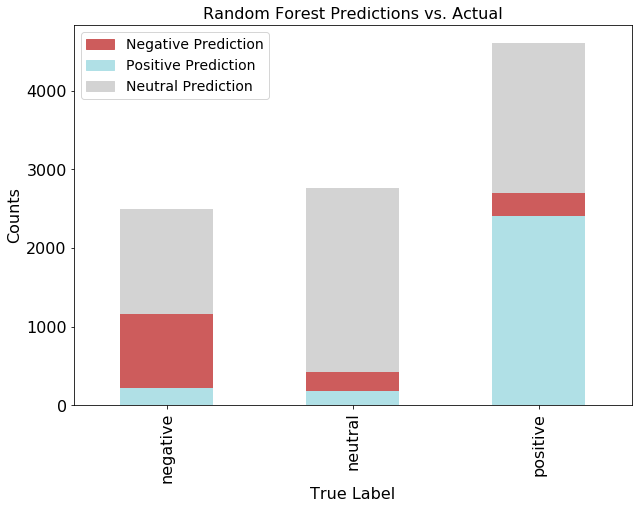

In [73]:
rf_pivot.loc[:,['positive','negative', 'neutral']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 16)
plt.title('Random Forest Predictions vs. Actual', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 2)
plt.savefig('RF_predictions.jpeg')
;

''

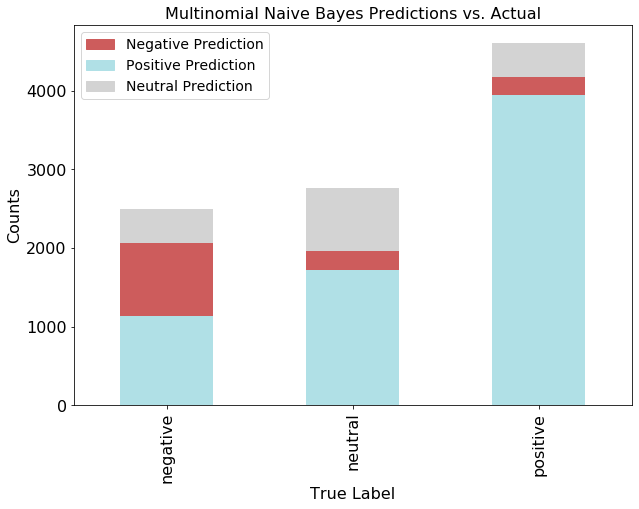

In [74]:
mnb_pivot.loc[:,['positive','negative', 'neutral']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 16)
plt.title('Multinomial Naive Bayes Predictions vs. Actual', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 2)
plt.savefig('MNB_predictions.jpeg')
;

''

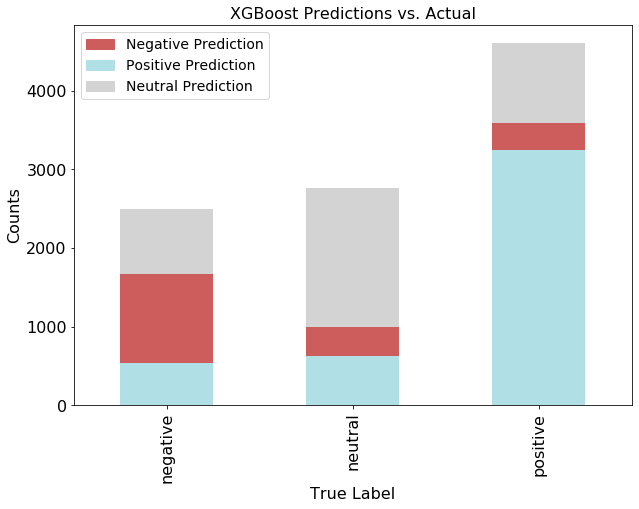

In [75]:
xb_pivot.loc[:,['positive','negative', 'neutral']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 16)
plt.title('XGBoost Predictions vs. Actual', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 2)
plt.savefig('XGB_predictions.jpeg')

;

In [76]:
mnb_pct = mnb_pivot
mnb_pct['total'] = mnb_pct['negative'] + mnb_pct['positive'] + mnb_pct['neutral']
mnb_pct['negative_pred'] = mnb_pct['negative']/mnb_pct['total'] * 100
mnb_pct['positive_pred'] = mnb_pct['positive']/mnb_pct['total'] * 100
mnb_pct['neutral_pred'] = mnb_pct['neutral']/mnb_pct['total'] * 100
mnb_pct

predicted,negative,neutral,positive,total,negative_pred,positive_pred,neutral_pred
true,,,,,,,
negative,930,425,1139,2494,37.289495,45.669607,17.040898
neutral,244,801,1718,2763,8.830981,62.178791,28.990228
positive,228,438,3939,4605,4.951140,85.537459,9.511401


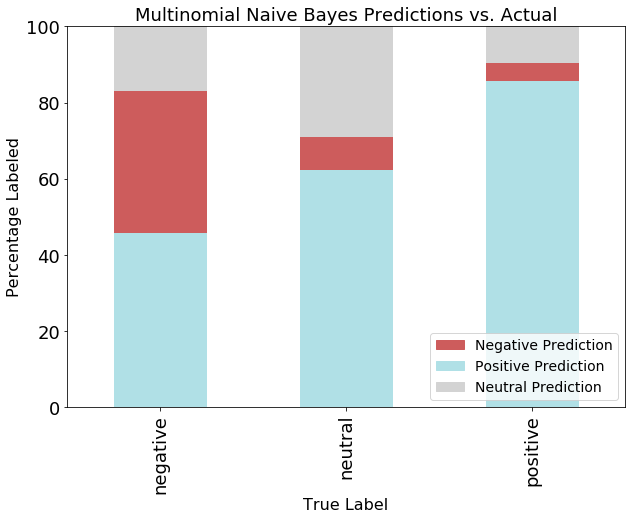

In [77]:
mnb_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('Multinomial Naive Bayes Predictions vs. Actual', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.ylim(0, 100)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 4)
plt.savefig('MNB_predictions_pct.jpeg');

In [78]:
rf_pct = rf_pivot
rf_pct['total'] = rf_pct['negative'] + rf_pct['positive'] + rf_pct['neutral']
rf_pct['negative_pred'] = rf_pct['negative']/rf_pct['total'] * 100
rf_pct['positive_pred'] = rf_pct['positive']/rf_pct['total'] * 100
rf_pct['neutral_pred'] = rf_pct['neutral']/rf_pct['total'] * 100
rf_pct

predicted,negative,neutral,positive,total,negative_pred,positive_pred,neutral_pred
true,,,,,,,
negative,935,1338,221,2494,37.489976,8.861267,53.648757
neutral,245,2338,180,2763,8.867173,6.514658,84.618169
positive,297,1903,2405,4605,6.449511,52.225841,41.324647


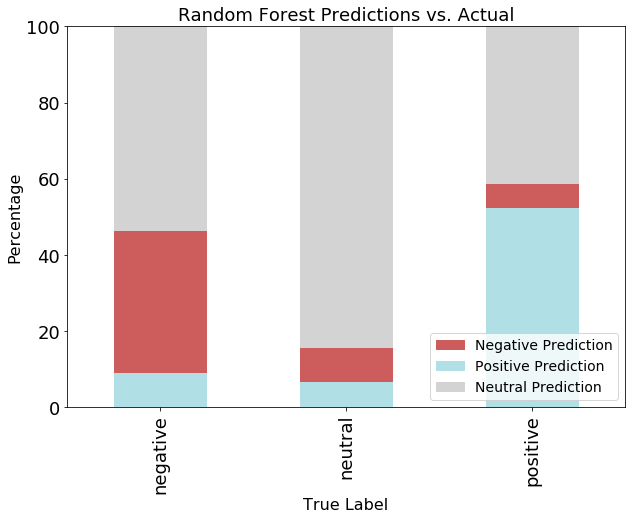

In [79]:
rf_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('Random Forest Predictions vs. Actual', fontsize = 18)
plt.ylabel('Percentage', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('RF_predictions_pct.jpeg')
plt.ylim(0, 100)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 4);

In [80]:
xb_pct = xb_pivot
xb_pct['total'] = xb_pct['negative'] + xb_pct['positive'] + xb_pct['neutral']
xb_pct['negative_pred'] = xb_pct['negative']/xb_pct['total'] * 100
xb_pct['positive_pred'] = xb_pct['positive']/xb_pct['total'] * 100
xb_pct['neutral_pred'] = xb_pct['neutral']/xb_pct['total'] * 100
xb_pct

predicted,negative,neutral,positive,total,negative_pred,positive_pred,neutral_pred
true,,,,,,,
negative,1129,822,543,2494,45.268645,21.772253,32.959102
neutral,369,1761,633,2763,13.355049,22.909881,63.735071
positive,343,1017,3245,4605,7.448426,70.466884,22.084691


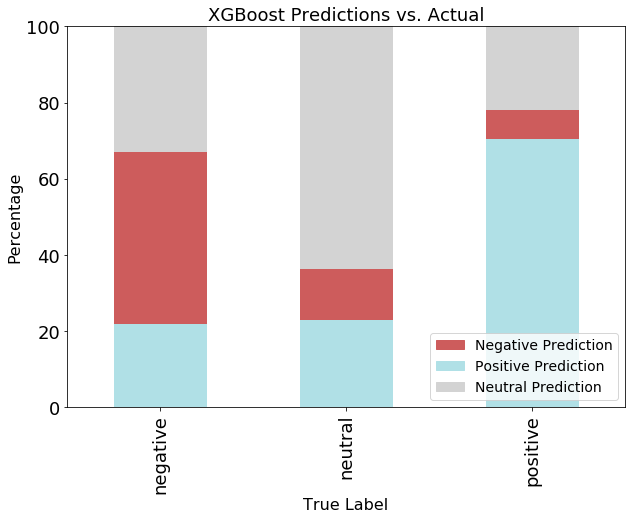

In [81]:
xb_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('XGBoost Predictions vs. Actual', fontsize = 18)
plt.ylabel('Percentage', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.ylim(0, 100)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 4)
plt.savefig('../images/XGB_predictions_pct.jpeg');


## Comparing Across Models

In [82]:
comp = pd.read_csv('model_comparison.csv')

In [83]:
comp

,Unnamed: 0,Negative Precision,Neutral Precision,Positive Precision,Macro-avg Precision,Negative Recall,Neutral Recall,Positive Recall,Macro-avg Recall,Negative F1-Score,Neutral F1-Score,Positive F1-Score,Macro-avg F1-Score,Avg Accuracy,ROC_AUC_Score
0,Multi.Naive.Bayes,0.66,0.48,0.58,0.57,0.37,0.29,0.86,0.52,0.48,0.36,0.69,0.51,0.57,0.761
1,XGBoost,0.61,0.49,0.73,0.61,0.45,0.64,0.70,0.60,0.52,0.55,0.72,0.60,0.62,0.799
2,RandForest,0.60,0.50,0.82,0.64,0.42,0.83,0.47,0.57,0.50,0.62,0.60,0.57,0.59,0.761
3,Multi.Perceptron,0.45,0.69,0.53,0.56,0.50,0.69,0.48,0.55,0.47,0.69,0.50,0.55,0.58,0.729


In [84]:
#Import model comparison statistics from csv

# new_header = comp.iloc[0] #grab the first row for the header
# comp = comp[1:] #take the data less the header row
# comp.columns = new_header
comp.columns = ['Model',  'Negative Precision',   'Neutral Precision',
        'Positive Precision', 'Macro-avg Precision',     'Negative Recall',
            'Neutral Recall',     'Positive Recall',    'Macro-avg Recall',
         'Negative F1-Score',    'Neutral F1-Score',   'Positive F1-Score',
        'Macro-avg F1-Score',        'Avg Accuracy', 'ROC AUC Score']
comp.head()


,Model,Negative Precision,Neutral Precision,Positive Precision,Macro-avg Precision,Negative Recall,Neutral Recall,Positive Recall,Macro-avg Recall,Negative F1-Score,Neutral F1-Score,Positive F1-Score,Macro-avg F1-Score,Avg Accuracy,ROC AUC Score
0,Multi.Naive.Bayes,0.66,0.48,0.58,0.57,0.37,0.29,0.86,0.52,0.48,0.36,0.69,0.51,0.57,0.761
1,XGBoost,0.61,0.49,0.73,0.61,0.45,0.64,0.70,0.60,0.52,0.55,0.72,0.60,0.62,0.799
2,RandForest,0.60,0.50,0.82,0.64,0.42,0.83,0.47,0.57,0.50,0.62,0.60,0.57,0.59,0.761
3,Multi.Perceptron,0.45,0.69,0.53,0.56,0.50,0.69,0.48,0.55,0.47,0.69,0.50,0.55,0.58,0.729


In [85]:
float_cols = ['Negative Precision',   'Neutral Precision',
        'Positive Precision', 'Macro-avg Precision',     'Negative Recall',
            'Neutral Recall',     'Positive Recall',    'Macro-avg Recall',
         'Negative F1-Score',    'Neutral F1-Score',   'Positive F1-Score',
        'Macro-avg F1-Score',        'Avg Accuracy', 'ROC AUC Score']
comp[float_cols] = comp[float_cols].astype(float)


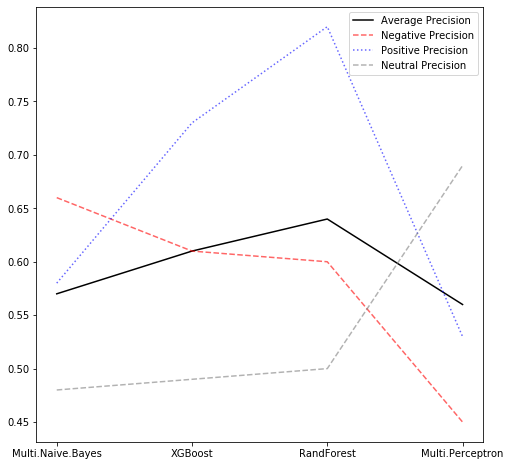

In [86]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(comp['Model'], comp['Macro-avg Precision'], color = 'black', label = 'Average Precision')
# ax.scatter(comp['Model'], comp['Macro-avg Precision'], color = 'black', label = 'Average Precision')
ax.plot(comp['Model'], comp['Negative Precision'], color = 'red', label = 'Negative Precision', alpha = 0.6, linestyle='dashed')
ax.plot(comp['Model'], comp['Positive Precision'], color = 'blue', label = 'Positive Precision', alpha = 0.6, linestyle='dotted')
ax.plot(comp['Model'], comp['Neutral Precision'], color = 'gray', label = 'Neutral Precision', alpha = 0.6, linestyle='--')

ax.legend()
# ax.plot(comp['Model'], comp['Macro-avg Precision'], color = 'red', label = 'Average Precision')
# ax.scatter(comp['Model'], comp['Macro-avg Precision'], color = 'blue', label = 'Average Precision')

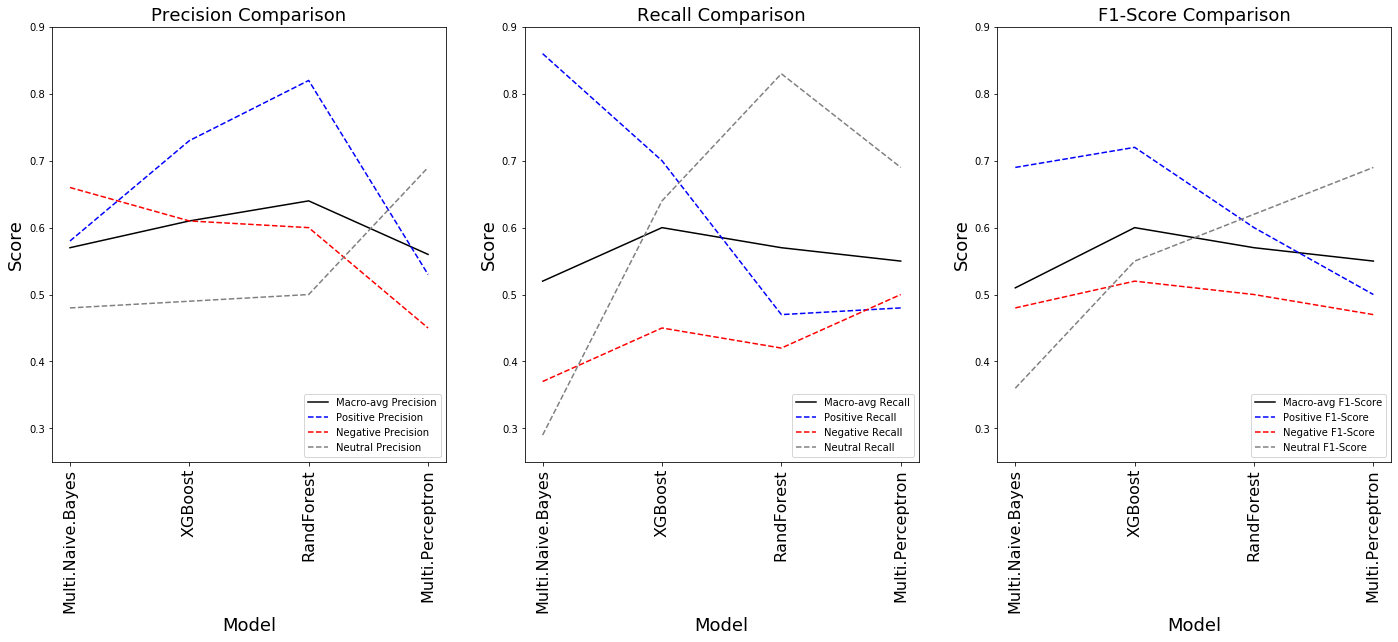

In [87]:
groups = ['Macro-avg', 'Positive', 'Negative', 'Neutral']
metrics = ['Precision', 'Recall', 'F1-Score']
cols = ['black', 'blue', 'red', 'gray']
linestyles = ['solid', 'dashed', 'dashed', 'dashed']
titles = ['Precision Comparison', 'Recall Comparison', 'F1-Score Comparison']

fig, axs = plt.subplots(1,3, figsize = (24,8))


for ax, met, title in zip(axs.flatten(), metrics, titles):
    for gr, col, ls in zip(groups, cols, linestyles): 
        ax.plot(comp['Model'], comp[f'{gr} {met}'], color = col, label = f'{gr} {met}', linestyle = ls)
        ax.legend(loc = 4)
        ax.set_xticklabels(comp['Model'],fontsize = 16, rotation = 90)
    ax.set_title(title , fontsize = 18)
    ax.set_ylim(0.25,0.9)
    ax.set_xlabel('Model', fontsize = 18)
    ax.set_ylabel('Score', fontsize = 18)

fig.savefig('../images/Model_comparison.jpeg')

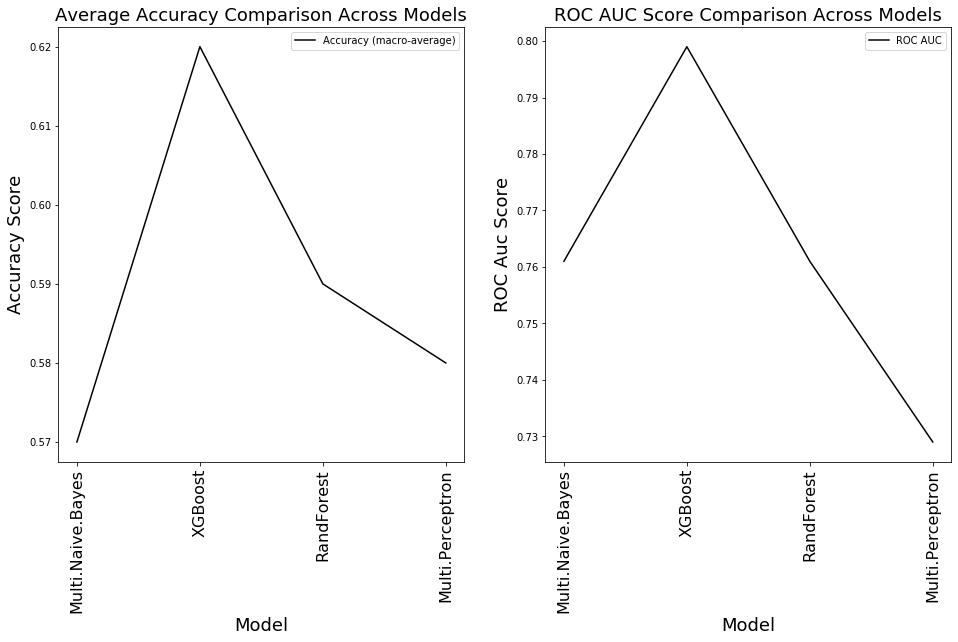

In [88]:
fig, ax = plt.subplots(1, 2, figsize = (16,8))


ax[0].plot(comp['Model'], comp['Avg Accuracy'], color = 'black', label = 'Accuracy (macro-average)')
ax[0].set_xticklabels(comp['Model'],fontsize = 16 ,rotation = 90)
ax[0].set_title('Average Accuracy Comparison Across Models' , fontsize = 18)
ax[0].set_xlabel('Model', fontsize = 18)
ax[0].set_ylabel('Accuracy Score', fontsize = 18)
ax[0].legend()

ax[1].plot(comp['Model'], comp['ROC AUC Score'], color = 'black', label = 'ROC AUC')
ax[1].set_xticklabels(comp['Model'],fontsize = 16 ,rotation = 90)
ax[1].set_title('ROC AUC Score Comparison Across Models' , fontsize = 18)
ax[1].set_xlabel('Model', fontsize = 18)
ax[1].set_ylabel('ROC Auc Score', fontsize = 18)
ax[1].legend()
fig.savefig('../images/Accuracy_roc_comparison.jpeg');


## Looking at Threshold

Observation: XGBoost does really gooda t predicting neutral correctly and okay at predicting positive.  But a lot of the true negatives are labeled as neutral.  A good amount of the ture positives are also labeled as neutral.

Random forest has same issue but is better at detecting true negatives than other models.


In [89]:
#Look at true negatives

xb_tn = xb_predictions[xb_predictions['true']=='negative']
xb_tn.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
2,0.418522,0.334772,0.246706,negative,negative
4,0.813161,0.130280,0.056559,negative,negative
6,0.252191,0.296729,0.451080,positive,negative
14,0.299433,0.454030,0.246538,neutral,negative
15,0.268888,0.426362,0.304749,neutral,negative


In [90]:
colors2 = ['indianred', 'lightgrey', 'powderblue' ]

In [91]:
num_array = LabelEncoder().fit_transform(xb_tn['predicted'])
color_preds = np.array(colors2)[num_array]

''

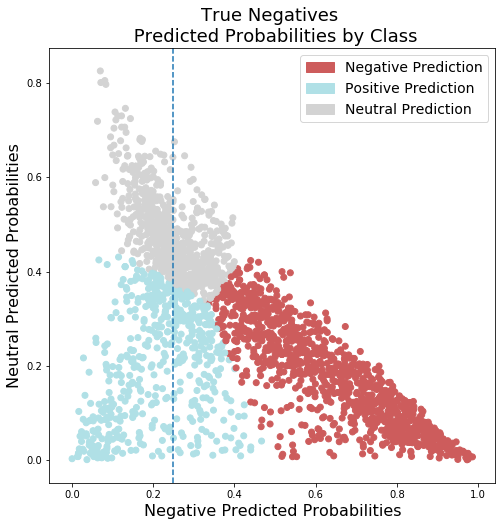

In [132]:
#Plot shows True Negatives
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(xb_tn['negative_prob'], xb_tn['neutral_prob'], color = color_preds)
ax.set_title('True Negatives \n Predicted Probabilities by Class', fontsize = 18)
ax.set_xlabel('Negative Predicted Probabilities', fontsize = 16)
ax.set_ylabel('Neutral Predicted Probabilities', fontsize = 16)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 1)
ax.axvline(x = 0.25, linestyle = 'dashed')
fig.savefig('../images/True_negatives.jpeg')
;


What would happen if we set a threshold for negative class if probability was higher than 0.2? 

In [93]:
xb_neg_thresh = xb_predictions

In [94]:
xb_neg_thresh['adj_pred'] = np.where(xb_neg_thresh['negative_prob']>0.25, 'negative', xb_neg_thresh['predicted'])

In [95]:
colors

['powderblue', 'indianred', 'lightgrey']

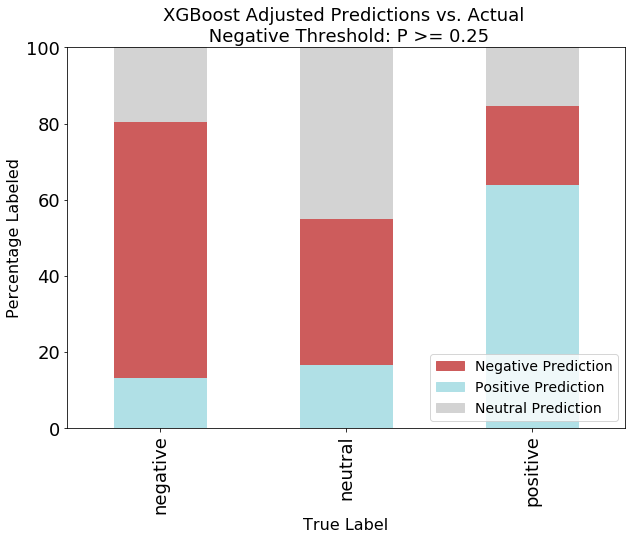

In [134]:
xb_adj_counts = xb_neg_thresh.groupby(['true', 'adj_pred']).size().reset_index()
xb_pivot_adj = xb_adj_counts.pivot(index='true', columns='adj_pred', values=0)

xb_pct = xb_pivot_adj
xb_pct['total'] = xb_pct['negative'] + xb_pct['positive'] + xb_pct['neutral']
xb_pct['negative_pred'] = xb_pct['negative']/xb_pct['total'] * 100
xb_pct['positive_pred'] = xb_pct['positive']/xb_pct['total'] * 100
xb_pct['neutral_pred'] = xb_pct['neutral']/xb_pct['total'] * 100


xb_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('XGBoost Adjusted Predictions vs. Actual \n Negative Threshold: P >= 0.25', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 4)
plt.savefig('../images/XGB_predictions_adjusted.jpeg')
plt.ylim(0, 100);

''

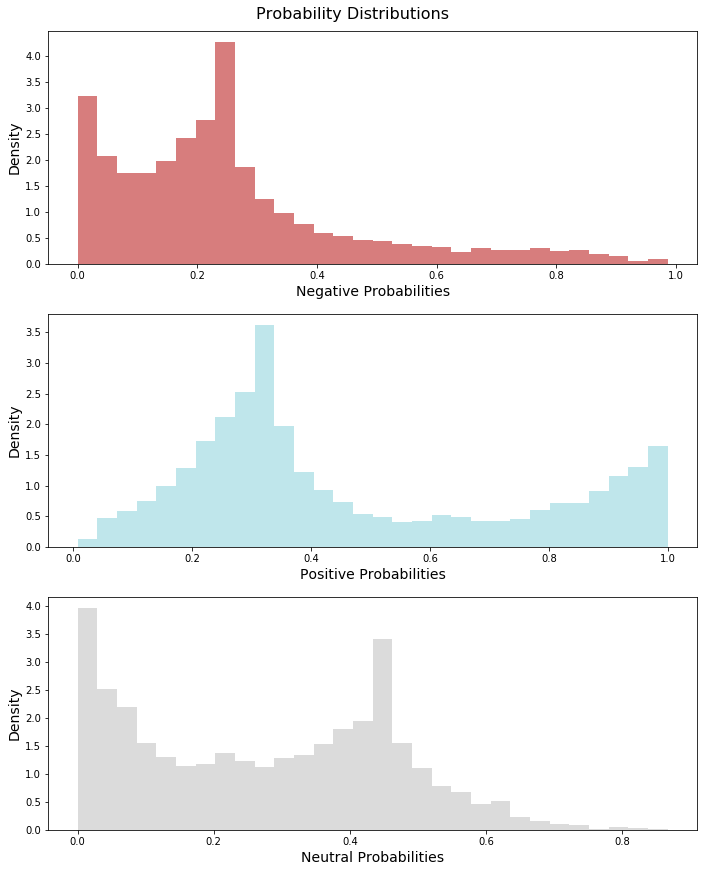

In [126]:
fig, ax = plt.subplots(3, figsize = (10, 12))
fig.suptitle('Probability Distributions', y = 1.01, fontsize = 16)
ax[0].hist(xb_predictions['negative_prob'], color = 'indianred', alpha = 0.8, bins = 30, density = True)
ax[0].set_xlabel('Negative Probabilities', fontsize = 14)
ax[0].set_ylabel('Density', fontsize = 14)
ax[1].hist(xb_predictions['positive_prob'], color = 'powderblue', alpha = 0.8, bins = 30, density = True)
ax[1].set_xlabel('Positive Probabilities', fontsize = 14)
ax[1].set_ylabel('Density', fontsize = 14)
ax[2].hist(xb_predictions['neutral_prob'], color = 'lightgray', alpha = 0.8, bins = 30, density = True)
ax[2].set_xlabel('Neutral Probabilities', fontsize = 14)
ax[2].set_ylabel('Density', fontsize = 14)
fig.tight_layout(pad = 1.5)
;

#What if we Lowered the threshold for calling something neutral? 


''

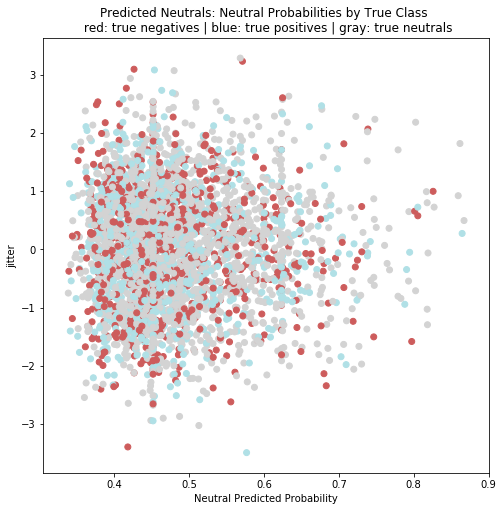

In [97]:
#data of everything labeled neutral
xb_neut_label = xb_predictions[xb_predictions['predicted']=='neutral']

num_array = LabelEncoder().fit_transform(xb_neut_label['true'])
color_true = np.array(colors2)[num_array]


#Plot shows Predicted Neutrals.  Colors represent true values

jitter =np.random.normal(size = len(num_array))

fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(xb_neut_label['neutral_prob'], jitter, color = color_true)
ax.set_title('Predicted Neutrals: Neutral Probabilities by True Class \n red: true negatives | blue: true positives | gray: true neutrals')
ax.set_xlabel('Neutral Predicted Probability')
ax.set_ylabel('jitter')
fig.savefig('../images/predicted_neutrals.jpeg')
;

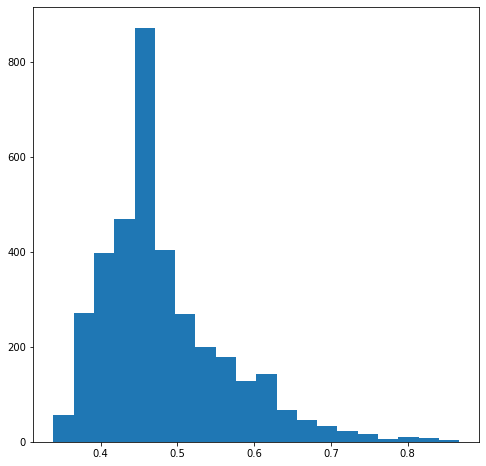

In [98]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.hist(xb_neut_label['neutral_prob'], bins = 20);

What if we only predict neutral if the neutral predicted probability is above 0.45? 

In [99]:
neut_thresh = xb_predictions


p_or_n = np.where(neut_thresh['negative_prob']>neut_thresh['positive_prob'], 'negative', 'positive')

neut_thresh['p_or_n'] = p_or_n

neut_thresh['neut_wt_pred'] = np.where(neut_thresh['neutral_prob']<0.40, p_or_n, xb_neg_thresh['adj_pred'])
neut_thresh = neut_thresh.drop(columns = ['p_or_n'])

neut_thresh

,negative_prob,neutral_prob,positive_prob,predicted,true,adj_pred,neut_wt_pred
0,0.228550,0.459062,0.312388,neutral,positive,neutral,neutral
1,0.162734,0.407320,0.429946,positive,neutral,positive,positive
2,0.418522,0.334772,0.246706,negative,negative,negative,negative
3,0.002134,0.000336,0.997530,positive,positive,positive,positive
4,0.813161,0.130280,0.056559,negative,negative,negative,negative
...,...,...,...,...,...,...,...
9857,0.158925,0.422088,0.418986,neutral,neutral,neutral,neutral
9858,0.233442,0.482638,0.283920,neutral,neutral,neutral,neutral
9859,0.221402,0.183065,0.595533,positive,positive,positive,positive
9860,0.007370,0.003285,0.989345,positive,positive,positive,positive


In [100]:
neut_wt_counts = neut_thresh.groupby(['true', 'neut_wt_pred']).size().reset_index()
xb_pivot_neut = neut_wt_counts.pivot(index='true', columns='neut_wt_pred', values=0)


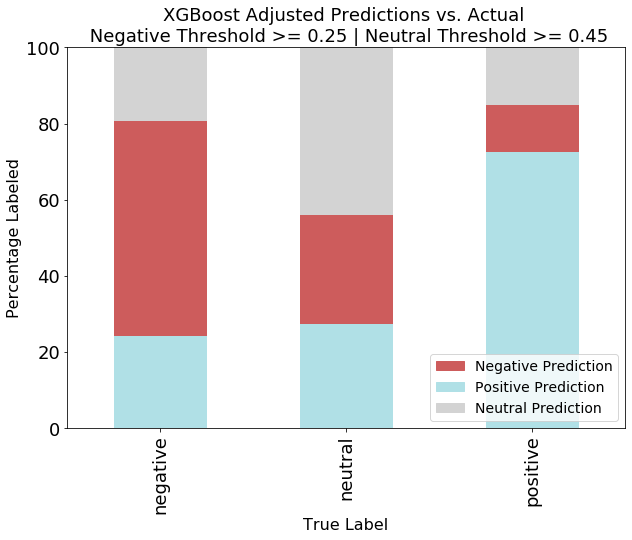

In [137]:
neut_wt_counts = neut_thresh.groupby(['true', 'neut_wt_pred']).size().reset_index()
xb_pivot_neut = neut_wt_counts.pivot(index='true', columns='neut_wt_pred', values=0)

xb_pct = xb_pivot_neut
xb_pct['total'] = xb_pct['negative'] + xb_pct['positive'] + xb_pct['neutral']
xb_pct['negative_pred'] = xb_pct['negative']/xb_pct['total'] * 100
xb_pct['positive_pred'] = xb_pct['positive']/xb_pct['total'] * 100
xb_pct['neutral_pred'] = xb_pct['neutral']/xb_pct['total'] * 100


xb_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('XGBoost Adjusted Predictions vs. Actual \n Negative Threshold >= 0.25 | Neutral Threshold >= 0.45', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 4)
plt.savefig('../images/XGB_predictions_adjusted_neutral_weight.jpeg')
plt.ylim(0, 100);